In [1]:
import numpy as np
import cv2
import os
import re
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename))

# -------------------- Load Dataset ------------------------

dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset"

imgs_train = []
imgs_test = []
img_train_files = []
img_test_files = []
labels_train = []
labels_test = []
descs = []
for folder in os.listdir(dataset_dir):
  if folder == "train":
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        if sub_folder == "schizophrenia":
            sub_folder= "healthy"
        else:
            sub_folder= "schizophrenia"
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1

        for i, filename in enumerate(sub_folder_files):
            img_train = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            img_train_files.append(img_train)
            gray = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)

            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]

            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

            #imgs.append(gray)
            labels_train.append(sub_folder)
            descs.append(normalize_desc(folder, sub_folder))
            print_progress(i, len_sub_folder, folder, sub_folder, filename)
  elif folder == "test":
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        if sub_folder == "schizophrenia":
            sub_folder= "healthy"
        else:
            sub_folder= "schizophrenia"
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1

        for i, filename in enumerate(sub_folder_files):
            img_test = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            img_test_files.append(img_test)
            gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]

            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

            #imgs.append(gray)
            labels_test.append(sub_folder)
            descs.append(normalize_desc(folder, sub_folder))
            print_progress(i, len_sub_folder, folder, sub_folder, filename)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
label_train_dl = labels_train
# Apply data augmentation to the training set
augmented_data_train = []
augmented_labels_train = []
for image, label in zip(img_train_files, labels_train):
  for i in range(3):
    augmented_image = datagen.random_transform(image)
    augmented_data_train.append(augmented_image)
    augmented_labels_train.append(label)
augmented_data_train = np.array(augmented_data_train)
augmented_labels_train = np.array(augmented_labels_train)
imgs_aug = augmented_data_train
labels_aug = augmented_labels_train
print("\nAugumented images:", len(imgs_aug), "\nSize:",imgs_aug[0].shape)

labels_train=[]
for img,labels_for  in zip(imgs_aug, labels_aug):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  h, w = gray.shape
  ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
  crop = gray[ymin:ymax, xmin:xmax]

  resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

  imgs_train.append(gray)
  labels_train.append(labels_for)
print("\n Gray images:", len(imgs_train), "\nSize:",imgs_train[0].shape)

# Apply data augmentation to the testing set
label_test_dl = labels_test
augmented_data_test = []
augmented_labels_test = []
for image, label in zip(img_test_files, labels_test):
  for i in range(3):
    augmented_image = datagen.random_transform(image)
    augmented_data_test.append(augmented_image)
    augmented_labels_test.append(label)
augmented_data_test = np.array(augmented_data_test)
augmented_labels_test = np.array(augmented_labels_test)
imgs_aug = augmented_data_test
labels_aug = augmented_labels_test
print("\nAugumented images:", len(imgs_aug), "\nSize:",imgs_aug[0].shape)

labels_test=[]
for img,labels_for  in zip(imgs_aug, labels_aug):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  h, w = gray.shape
  ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
  crop = gray[ymin:ymax, xmin:xmax]

  resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

  imgs_test.append(gray)
  labels_test.append(labels_for)
print("\n Gray images:", len(imgs_test), "\nSize:",imgs_test[0].shape)

[          ] folder : train/healthy/ ----> file : NM2077.png
[          ] folder : train/healthy/ ----> file : NM2073.png
[          ] folder : train/healthy/ ----> file : NM2075.png
[          ] folder : train/healthy/ ----> file : NM2010.png
[          ] folder : train/healthy/ ----> file : NM2071.png
[#         ] folder : train/healthy/ ----> file : NM2061.png
[#         ] folder : train/healthy/ ----> file : NM2018.png
[#         ] folder : train/healthy/ ----> file : NM2052.png
[#         ] folder : train/healthy/ ----> file : NM2025.png
[#         ] folder : train/healthy/ ----> file : NM2029.png
[#         ] folder : train/healthy/ ----> file : CC4896.png
[#         ] folder : train/healthy/ ----> file : NM2004.png
[#         ] folder : train/healthy/ ----> file : CC7411.png
[#         ] folder : train/healthy/ ----> file : NM2060.png
[##        ] folder : train/healthy/ ----> file : NM2012.png
[##        ] folder : train/healthy/ ----> file : CC5529.png
[##        ] folder : tr

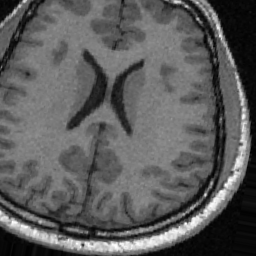

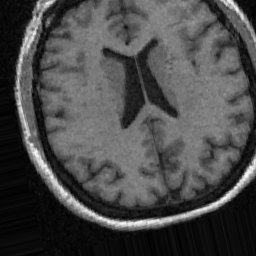

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs_train[5])
cv2_imshow(imgs_test[5])

In [4]:
from skimage.feature import graycomatrix, graycoprops
imgs = imgs_train
labels = labels_train
# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
#[0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(img,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label)
    #print(feature)
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
#properties = ['correlation']
glcm_all_agls = []

for img, label in zip(imgs, labels):
    glcm_all_agls.append(
            calc_glcm_all_agls(img,
                                label,
                                props=properties)
                            )

columns = []
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
for name in properties :
    for ang in angles:
        columns.append(name + "_" + str(ang))

columns.append("label")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls,
                      columns = columns)

glcm_df.shape

(525, 25)

In [5]:
from skimage.feature import local_binary_pattern, hog
# Function to calculate HOG features for a single image
def calc_hog_feature(img, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(8, 8)):
    # Calculate HOG features
    #hog_features, hog_image = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    # Rescale histogram for better display
    #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Return HOG features
    return hog_features

# Calculate HOG features for all images
hog_all = [calc_hog_feature(img) for img in imgs]

# Convert HOG features to DataFrame
hog_df = pd.DataFrame(hog_all, columns=[f'hog_{i}' for i in range(len(hog_all[0]))])

hog_df['label'] = labels
hog_df.shape

(525, 513)

In [6]:
from skimage.feature import local_binary_pattern

from sklearn.preprocessing import StandardScaler
import pandas as pd
from skimage.feature import local_binary_pattern, hog
from skimage import exposure
import numpy as np
from scipy.stats import ttest_ind
# Function to calculate LBP features for a single image
def calc_lbp_feature(img, radius=1, n_points=100):
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    return hist

# Calculate LBP features for all images
lbp_all = [calc_lbp_feature(img) for img in imgs]

# Convert LBP features to DataFrame
lbp_df = pd.DataFrame(lbp_all, columns=[f'lbp_{i}' for i in range(len(lbp_all[0]))])
lbp_df['label'] = labels



# Concatenate LBP features with GLCM features
combined_df = pd.concat([hog_df.drop(columns=['label']),lbp_df.drop(columns=['label']),glcm_df], axis=1)
#combined_df = glcm_df
#combined_df = lbp_df
#combined_df = hog_df
print(combined_df)
# Assuming 'label' is the target variable

X_train = combined_df.drop(columns=['label'])
y_train = combined_df['label']

#X = combined_df.drop(combined_df.index[-1])
#y = combined_df.iloc[-1]

# Scale the input data using StandardScaler
scaler_combined = StandardScaler()
X_scaled_train = scaler_combined.fit_transform(X_train.values)

        hog_0     hog_1     hog_2     hog_3     hog_4     hog_5     hog_6  \
0    0.082930  0.169261  0.107430  0.026137  0.013925  0.004047  0.011384   
1    0.000085  0.000000  0.001754  0.009091  0.039578  0.000475  0.000240   
2    0.082990  0.150016  0.134102  0.032501  0.012175  0.008317  0.009742   
3    0.015285  0.051443  0.209213  0.093944  0.019963  0.009958  0.017719   
4    0.001692  0.000271  0.000358  0.000000  0.018502  0.012000  0.003353   
..        ...       ...       ...       ...       ...       ...       ...   
520  0.002926  0.000506  0.000436  0.000237  0.011374  0.052379  0.013384   
521  0.003619  0.000075  0.000323  0.000000  0.002326  0.003693  0.035267   
522  0.001644  0.000000  0.000438  0.000000  0.008836  0.027678  0.004122   
523  0.001490  0.001162  0.001090  0.001528  0.016302  0.007128  0.002251   
524  0.007207  0.003628  0.012581  0.005111  0.005048  0.002659  0.005523   

        hog_7     hog_8     hog_9  ...  contrast_2.356194490192345     ASM_

In [7]:
from skimage.feature import graycomatrix, graycoprops
imgs = imgs_test
labels = labels_test
# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
#[0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(img,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label)
    #print(feature)
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
#properties = ['correlation']
glcm_all_agls = []

for img, label in zip(imgs, labels):
    glcm_all_agls.append(
            calc_glcm_all_agls(img,
                                label,
                                props=properties)
                            )

columns = []
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
for name in properties :
    for ang in angles:
        columns.append(name + "_" + str(ang))

columns.append("label")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls,
                      columns = columns)

glcm_df.shape

(225, 25)

In [8]:
from skimage.feature import local_binary_pattern, hog
# Function to calculate HOG features for a single image
def calc_hog_feature(img, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(8, 8)):
    # Calculate HOG features
    #hog_features, hog_image = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    # Rescale histogram for better display
    #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Return HOG features
    return hog_features

# Calculate HOG features for all images
hog_all = [calc_hog_feature(img) for img in imgs]

# Convert HOG features to DataFrame
hog_df = pd.DataFrame(hog_all, columns=[f'hog_{i}' for i in range(len(hog_all[0]))])
hog_df['label'] = labels
hog_df.shape

(225, 513)

In [9]:
from skimage.feature import local_binary_pattern

from sklearn.preprocessing import StandardScaler
import pandas as pd
from skimage.feature import local_binary_pattern, hog
from skimage import exposure
import numpy as np
from scipy.stats import ttest_ind
# Function to calculate LBP features for a single image
def calc_lbp_feature(img, radius=1, n_points=100):
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    return hist

# Calculate LBP features for all images
lbp_all = [calc_lbp_feature(img) for img in imgs]

# Convert LBP features to DataFrame
lbp_df = pd.DataFrame(lbp_all, columns=[f'lbp_{i}' for i in range(len(lbp_all[0]))])
lbp_df['label'] = labels

# Concatenate LBP features with GLCM features
combined_df = pd.concat([hog_df.drop(columns=['label']),lbp_df.drop(columns=['label']),glcm_df], axis=1)
#combined_df = glcm_df
#combined_df = lbp_df
#combined_df = hog_df
print(combined_df)

# Assuming 'label' is the target variable
X_test = combined_df.drop(columns=['label'])
y_test = combined_df['label']

#X = combined_df.drop(combined_df.index[-1])
#y = combined_df.iloc[-1]

# Scale the input data using StandardScaler
scaler_combined = StandardScaler()
X_scaled_test = scaler_combined.fit_transform(X_test.values)

        hog_0     hog_1     hog_2     hog_3     hog_4     hog_5     hog_6  \
0    0.047237  0.088212  0.049891  0.024533  0.027328  0.019038  0.015861   
1    0.052996  0.095189  0.053135  0.019090  0.015573  0.007872  0.012197   
2    0.001567  0.000000  0.000331  0.000000  0.009765  0.023885  0.007142   
3    0.041734  0.080282  0.101511  0.076274  0.072234  0.041959  0.031761   
4    0.000025  0.000000  0.000063  0.000039  0.015792  0.000194  0.000035   
..        ...       ...       ...       ...       ...       ...       ...   
220  0.001375  0.000033  0.000595  0.000000  0.027584  0.022489  0.004420   
221  0.003145  0.000168  0.000241  0.000000  0.001721  0.004921  0.044287   
222  0.068509  0.006419  0.002930  0.000404  0.001419  0.000261  0.001168   
223  0.030017  0.016617  0.021301  0.017992  0.044459  0.046344  0.041965   
224  0.007370  0.001320  0.003728  0.007525  0.008146  0.002624  0.009194   

        hog_7     hog_8     hog_9  ...  contrast_2.356194490192345     ASM_

In [10]:
import numpy as np
import cv2
import os
import re
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

# Load dataset and preprocess
healthy_path_train = '/content/gdrive/My Drive/Colab Notebooks/dataset/train/healthy'
schizophrenia_path_train = '/content/gdrive/My Drive/Colab Notebooks/dataset/train/schizophrenia'
healthy_path_test = '/content/gdrive/My Drive/Colab Notebooks/dataset/test/healthy'
schizophrenia_path_test = '/content/gdrive/My Drive/Colab Notebooks/dataset/test/schizophrenia'

def load_dataset(healthy_path_train, schizophrenia_path_train, healthy_path_test, schizophrenia_path_test):
    images_train = []
    images_test = []
    labels_train = []
    labels_test = []
    for img in os.listdir(healthy_path_train):
        img_path = os.path.join(healthy_path_train, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images_train.append(image)
        labels_train.append(0)
    for img in os.listdir(schizophrenia_path_train):
        img_path = os.path.join(schizophrenia_path_train, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images_train.append(image)
        labels_train.append(1)
    for img in os.listdir(healthy_path_test):
        img_path = os.path.join(healthy_path_test, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images_test.append(image)
        labels_test.append(0)
    for img in os.listdir(schizophrenia_path_test):
        img_path = os.path.join(schizophrenia_path_test, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images_test.append(image)
        labels_test.append(1)
    return np.array(images_train), np.array(images_test), np.array(labels_train), np.array(labels_test)

X_train, X_test, y_train, y_test = load_dataset(healthy_path_train, schizophrenia_path_train, healthy_path_test, schizophrenia_path_test)
print("Dataset loaded")

Dataset loaded


In [11]:
import os
import time
import numpy as np
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
y_train_no_cat = y_train
y_test_no_cat = y_test

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
print(X_train, X_test, y_train, y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
def print_layer_trainable():
    for layer in base_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

# Build and compile the model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()
base_model.trainable = False
#for layer in base_model.layers:
#    layer.trainable = False
print_layer_trainable()

model = Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(2048, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation = 'softmax')
])

#model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Model Chackpoint
tl_checkpoint_1 = ModelCheckpoint(filepath = 'vgg19_best_weights.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

# EarlyStopping
#early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

#ReduceLROnPlateau to stabilize the training process of the model
#rop_callback = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 10, verbose = 1, factor = 0.5, min_lr = 0.000001)

# Extra Data augmentation and training
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
train_generator = datagen.flow(X_train, y_train, batch_size=25)


[[[[ -95.939 -108.779 -115.68 ]
   [ -95.939 -108.779 -115.68 ]
   [ -97.939 -110.779 -117.68 ]
   ...
   [-100.939 -113.779 -120.68 ]
   [ -97.939 -110.779 -117.68 ]
   [-101.939 -114.779 -121.68 ]]

  [[-101.939 -114.779 -121.68 ]
   [-101.939 -114.779 -121.68 ]
   [-100.939 -113.779 -120.68 ]
   ...
   [-102.939 -115.779 -122.68 ]
   [ -98.939 -111.779 -118.68 ]
   [ -99.939 -112.779 -119.68 ]]

  [[ -99.939 -112.779 -119.68 ]
   [ -99.939 -112.779 -119.68 ]
   [ -98.939 -111.779 -118.68 ]
   ...
   [-102.939 -115.779 -122.68 ]
   [ -99.939 -112.779 -119.68 ]
   [-102.939 -115.779 -122.68 ]]

  ...

  [[ -99.939 -112.779 -119.68 ]
   [ -99.939 -112.779 -119.68 ]
   [ -94.939 -107.779 -114.68 ]
   ...
   [ -98.939 -111.779 -118.68 ]
   [ -97.939 -110.779 -117.68 ]
   [ -99.939 -112.779 -119.68 ]]

  [[ -97.939 -110.779 -117.68 ]
   [ -97.939 -110.779 -117.68 ]
   [ -95.939 -108.779 -115.68 ]
   ...
   [ -98.939 -111.779 -118.68 ]
   [ -99.939 -112.779 -119.68 ]
   [ -99.939 -112.779 

In [ ]:

#%%time
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) / 25,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks = [tl_checkpoint_1]#, early_stop, rop_callback]
)


# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])

# Plot training history
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected ylabel to 'Accuracy'
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plot AUC-ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_true_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


# Print evaluation results
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Sensitivity(recall):', recall)
print('Specificity:', specificity)
print('Precision:', precision_score(y_true_classes, y_pred_classes))
print('F1 Score:', f1_score(y_true_classes, y_pred_classes))
print('AUC-ROC Score:', roc_auc_score(y_true_classes, y_pred[:, 1]))
print(conf_matrix)
model.summary()


Epoch 1/10
7/7 [==============================] - 210s 32s/step - loss: 0.7145 - accuracy: 0.5143 - val_loss: 0.6925 - val_accuracy: 0.5067
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - ETA: 0s - loss: 0.7366 - accuracy: 0.4686 

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
features_train = model.predict(X_train)
features_test = model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)
print(features_train.shape, features_test.shape, features_train_flat.shape, features_test_flat.shape)


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance


#Encode string labels to numerical values
label_encoder = LabelEncoder()
y_train_ml = label_encoder.fit_transform(y_train_no_cat)
y_test_ml = label_encoder.fit_transform(y_test_no_cat)
y_train_dl = label_encoder.fit_transform(labels_train)
y_test_dl = label_encoder.fit_transform(labels_test)


X_scaled_train =  X_scaled_train + features_train_flat
X_scaled_test = X_scaled_test + features_test_flat
y_encoded_train = y_train_ml + y_train_dl
y_encoded_test = y_test_ml + y_test_dl
print(X_scaled_train.shape, X_scaled_test.shape, y_encoded_train.shape, y_encoded_test.shape)

for i in (0.3,0.3):
  print(f"\nTest Size: {i}")
  # Split the scaled data into training and testing sets
  X_train, X_test, y_train, y_test = X_scaled_train, X_scaled_test, y_encoded_train, y_encoded_test


  num_selected_features = 380

  def train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features, random_state=42, plot_roc=False, plot_f1=False, plot_corr=False, plot_learning_curve = False):
      rfe = RFE(estimator, n_features_to_select=num_selected_features,importance_getter='coef_')
      # Fit the RFE model to the training data
      X = pd.concat([pd.DataFrame(X_train),pd.DataFrame(X_test)],axis=0)
      X_train_rfe = rfe.fit_transform(X_train, y_train)

      # Get the selected feature names
      selected_feature_names = X.columns[rfe.support_]

      # Convert X_train_rfe to a DataFrame with column names
      X_train_rfe_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)
      #print(X_train_rfe_df.columns.values,X_train_rfe_df.shape)

      # Train the model using the selected features
      model = classifier
      model.fit(X_train_rfe_df.values, y_train)

      # Evaluate the model on the test set
      X_test_rfe = X_test[:, rfe.support_]
      y_pred = model.predict(X_test_rfe)

      # Predict probabilities for each class on the test set
      y_prob = model.predict_proba(X_test_rfe)
       # Calculate AUC-ROC score for the positive class
      fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
      auc_roc = auc(fpr, tpr)
      # Calculate AUC-ROC score for the positive class
      auc_roc_score = roc_auc_score(y_test, y_prob[:, 1])

      # Print metrics
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
      #recall = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')
      conf_matrix = confusion_matrix(y_test, y_pred)
      # specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

      # Handle the case when there are no true negatives
      if conf_matrix[0, 0] + conf_matrix[0, 1] != 0:
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
      else:
        specificity = 0.0
      recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])

      print(f"\nMetrics for {type(classifier).__name__}:")
      print(f"Accuracy: {accuracy:.2f}")
      print(f"Precision: {precision:.2f}")
      print(f"Sensitivity (Recall): {recall:.2f}")
      print(f"Specificity: {specificity:.2f}")
      print(f"F1 Score: {f1:.2f}")
      print(f"AUC-ROC Score: {auc_roc_score:.2f}")
      print(f"Confusion matrix:\n", conf_matrix)

      if plot_roc:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

      # Plot F1 score over different thresholds
      if plot_f1:
        plt.figure(figsize=(8, 6))
        f1_scores = [f1_score(y_test, y_prob[:, 1] > threshold) for threshold in thresholds]
        plt.plot(thresholds, f1_scores, label='F1 Score')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.title('F1 Score over Different Thresholds')
        plt.legend()
        plt.show()

      # Print correlation matrix
      if plot_corr:
        corr_matrix = X_train_rfe_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Selected Features')
        plt.show()

      if plot_learning_curve:
        train_sizes, train_scores, validation_scores = learning_curve(classifier, X_train_rfe_df.values, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
        plt.plot(train_sizes, np.mean(validation_scores, axis=1), 'o-', color="g", label="Validation Score")

        plt.xlabel("Training examples")
        plt.ylabel("Accuracy Score")
        plt.title("Learning Curve")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()

  # Create the RFE model with Logistic Regression as the estimator
  #Logistic Regression
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  train_evaluate_rfe(estimator, classifier, X_train,  y_train, X_test, y_test, num_selected_features, plot_learning_curve=True)

  # Decision Tree
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = DecisionTreeClassifier(random_state=104)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features,random_state=104)

  # Random Forest
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = RandomForestClassifier(n_estimators=100, random_state=29)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features,random_state=29, plot_learning_curve=True)

  # Gradient Boosted Trees
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = GradientBoostingClassifier(n_estimators=100, random_state=59)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features,random_state=59, plot_learning_curve=True)
  """
  # Extra Trees Classifier
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = ExtraTreesClassifier(n_estimators=100, random_state=20)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features,random_state=20, plot_learning_curve=True)

  # AdaBoost Classifier
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features, plot_learning_curve=True)

  # XGBoost Classifier
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = XGBClassifier(n_estimators=100, random_state=42)
  train_evaluate_rfe(estimator, classifier, X_train, y_train, X_test, y_test, num_selected_features, random_state=42, plot_learning_curve=True)
  """
  # HistGradientBoosting Classifier
  estimator = LogisticRegression(max_iter=100,penalty='l1', solver='liblinear')
  classifier = HistGradientBoostingClassifier(max_iter=100, random_state=42)
  train_evaluate_rfe(estimator, classifier , X_train, y_train, X_test, y_test, num_selected_features ,plot_roc=True, plot_f1=True, plot_corr=False, plot_learning_curve=True)
